In [67]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from scipy.optimize import linear_sum_assignment
from patsy import dmatrices
from patsy import dmatrix
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
# Import 'product' from 'itertools' for generating combinations of categories.
from itertools import product
# Import 'LabelEncoder' from 'sklearn.preprocessing' for label encoding categorical variables.
from sklearn.preprocessing import LabelEncoder
from scipy.stats import entropy


In [68]:
#loed the data set
McDonald=pd.read_csv('mcdonalds.csv')

In [69]:
#variable names
McDonald.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [70]:
#sample size
McDonald.shape

(1453, 15)

In [71]:

#visualise cantend of data
McDonald.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [72]:
McDonald.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING.

In [73]:
MD_x = McDonald.iloc[:, 0:11].values  # Convert the first 11 columns to a NumPy array to convert boolean value to integer

In [74]:
McDonald[0:11]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [75]:
MD_x = (MD_x == "Yes").astype(int)     # Convert "Yes" to 1, otherwise 0

In [76]:
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [77]:
col_means = np.round(MD_x.mean(axis=0), 2)  # Compute the column means and round to 2 decimal places

In [78]:

col_means

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [79]:
#store data column name
c=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']

In [80]:
#store column means value in data frame

col_means=pd.DataFrame(data=[MD_x.mean(axis=0)],columns=c)

In [81]:
col_means

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.55265,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.35788,0.198899,0.242946


In [82]:
MD_Data=pd.DataFrame(data=MD_x,columns=c)

In [83]:
MD_Data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [84]:
pca=PCA() # Initialize PCA

In [85]:
MD_Pca=pca.fit(MD_x) # Fit PCA on the data


In [86]:
# Get the explained variance ratios and cumulative variance
explained_variance = np.round(pca.explained_variance_ratio_, 4)
cumulative_variance = np.round(np.cumsum(explained_variance), 4)

In [87]:

# Get the standard deviations (square root of eigenvalues)
standard_deviation = np.round(np.sqrt(pca.explained_variance_), 4)

In [88]:
#store in data frame
Importance_of_components=pd.DataFrame(data=[standard_deviation ,explained_variance,cumulative_variance],index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

In [89]:
Importance_of_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard Deviation,0.7570,0.6075,0.5046,0.3988,0.3374,0.3103,0.2897,0.2751,0.2653,0.2488,0.2369
Proportion of Variance,0.2994,0.1928,0.1330,0.0831,0.0595,0.0503,0.0438,0.0395,0.0368,0.0324,0.0293
Cumulative Proportion,0.2994,0.4922,0.6252,0.7083,0.7678,0.8181,0.8619,0.9014,0.9382,0.9706,0.9999


## use factor loadings matrix

In [90]:
#Extract the loadings (components_ returns eigenvectors)
loadings_matrix = pca.components_.T

In [91]:
#Convert to a DataFrame for better readability
loadings_df = pd.DataFrame(loadings_matrix, index=c,
                           columns=[f'PC{i+1}' for i in range(loadings_matrix.shape[1])])

# Display the loadings matrix
print("Factor Loadings (how each variable contributes to each principal component):")
print(loadings_df)

Factor Loadings (how each variable contributes to each principal component):
                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8    

In [92]:
#transform data and store in data frame
pca_projection =pd.DataFrame(data= pca.transform(MD_x),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

In [93]:
pca_projection

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [94]:
pca_projection.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,-3.667633e-17,-3.300870e-17,3.851014e-17,2.934106e-17,1.222544e-17,-3.392560e-17,2.934106e-17,-2.506216e-17,-7.549211e-17,5.012432e-17,-4.431723e-18
std,7.570495e-01,6.074556e-01,5.046195e-01,3.987986e-01,3.374050e-01,3.102746e-01,2.896973e-01,2.751220e-01,2.652511e-01,2.488418e-01,2.369028e-01
min,-1.188421e+00,-1.040274e+00,-8.808133e-01,-5.906209e-01,-1.045938e+00,-8.524911e-01,-8.059463e-01,-9.316201e-01,-9.557606e-01,-8.871971e-01,-8.851439e-01
25%,-5.476794e-01,-3.568482e-01,-4.507793e-01,-2.814986e-01,-2.433247e-01,-1.927027e-01,-1.342190e-01,-1.717258e-01,-1.181233e-01,-1.465751e-01,-1.053163e-01
50%,-7.074592e-02,-1.151632e-01,2.687734e-02,-1.163200e-01,3.348785e-02,-3.460184e-02,-6.366220e-02,-3.475619e-02,3.868061e-02,3.020635e-02,-1.201409e-02
75%,4.933012e-01,3.915540e-01,3.515939e-01,2.702298e-01,2.048293e-01,1.747453e-01,2.318357e-02,1.295966e-01,7.987794e-02,7.001416e-02,8.554080e-02
max,1.705573e+00,1.279130e+00,1.326976e+00,1.355278e+00,1.053327e+00,1.323793e+00,1.350886e+00,1.121388e+00,1.086693e+00,1.181524e+00,9.255829e-01


In [95]:
Importance_of_components[:1].round(1)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard Deviation,0.8,0.6,0.5,0.4,0.3,0.3,0.3,0.3,0.3,0.2,0.2


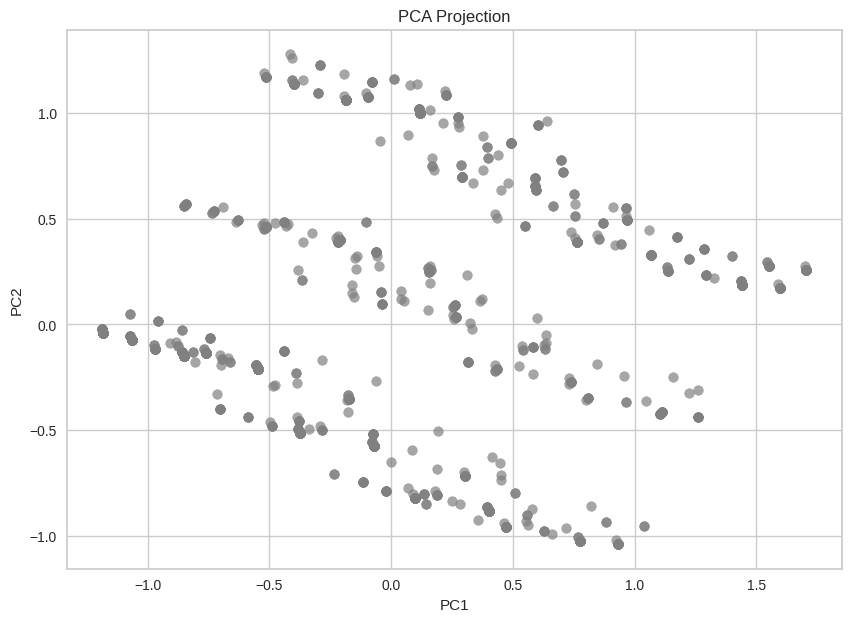

In [96]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_projection['PC1'], pca_projection['PC2'], color='grey', alpha=0.7) # Access columns by name
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.grid(True)
plt.show()



<ipython-input-97-0984b02cc7f8>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.quiver(0, 0, component[0], component[1], angles='xy', scale_units='xy', scale=1, color='red')
<ipython-input-97-0984b02cc7f8>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(component[0], component[1], c[i], color='red')


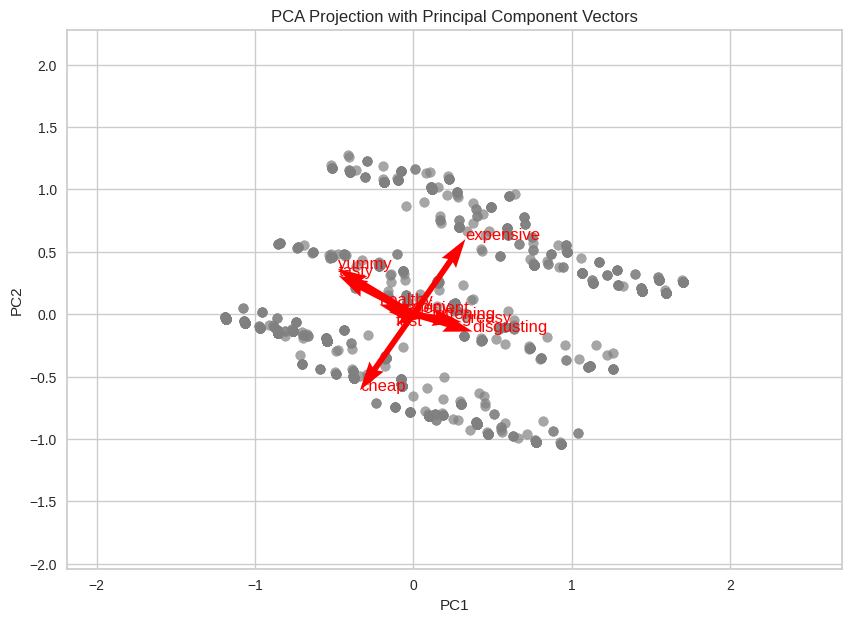

In [97]:
# Loadings
loadings = pca.components_.T

plt.figure(figsize=(10, 7))

# Access data using .iloc[] for integer-location based indexing
plt.scatter(pca_projection.iloc[:, 0], pca_projection.iloc[:, 1], color='grey', alpha=0.7)

# Add arrows for principal components
# Iterate over the rows of loadings_df
for i in range(loadings_df.shape[0]):
    component = loadings_df.iloc[i] # Extract the row as a Series
    plt.quiver(0, 0, component[0], component[1], angles='xy', scale_units='xy', scale=1, color='red')
    plt.text(component[0], component[1], c[i], color='red')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Principal Component Vectors')
plt.grid(True)
# Access data using .iloc[] for integer-location based indexing
plt.xlim(pca_projection.iloc[:, 0].min() - 1, pca_projection.iloc[:, 0].max() + 1)
plt.ylim(pca_projection.iloc[:, 1].min() - 1, pca_projection.iloc[:, 1].max() + 1)
plt.show()

# Kmean

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

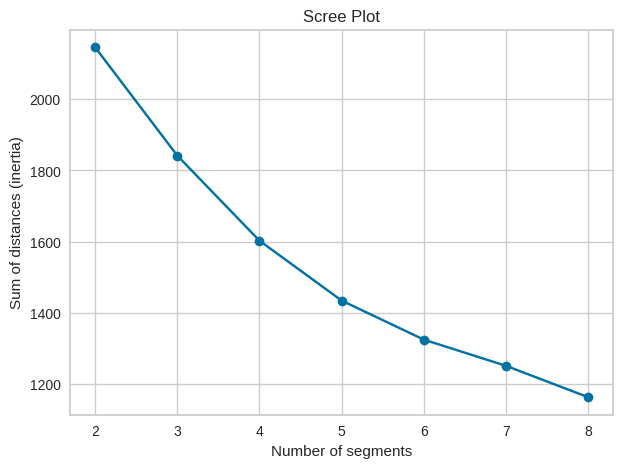

In [98]:


# Set random seed for reproducibility
np.random.seed(1234)



# Range of clusters
cluster_range = range(2, 9)
inertia = []
kmean_Data=pd.DataFrame({k:[] for k in cluster_range})
MD_km28 = {}
# K-Means clustering with 10 random restarts for each cluster number
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(MD_Data)
    a=kmeans.fit_predict(MD_Data)
    kmean_Data[k]=a
    inertia.append(kmeans.inertia_)
    MD_km28[str(k)] = kmeans

# Scree plot (sum of squared distances within clusters)
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Sum of distances (inertia)')
plt.title('Scree Plot')
plt.show()


In [99]:
kmean_Data

,2,3,4,5,6,7,8
0,1,1,0,3,2,4,0
1,0,2,2,1,5,0,5
2,0,0,2,4,1,3,5
3,0,2,1,1,5,0,1
4,1,1,0,3,2,5,0
...,...,...,...,...,...,...,...
1448,1,0,3,0,3,2,2
1449,0,2,1,2,4,1,3
1450,0,0,2,4,1,3,4
1451,0,2,1,2,4,1,3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

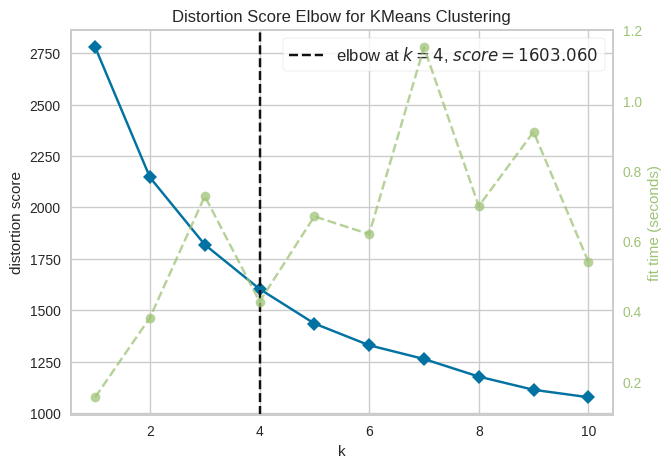

In [100]:

model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,11))
visualizer.fit(MD_Data)
visualizer.show();

In [101]:
MD_km28

{'2': KMeans(n_clusters=2, random_state=0),
 '3': KMeans(n_clusters=3, random_state=0),
 '4': KMeans(n_clusters=4, random_state=0),
 '5': KMeans(n_clusters=5, random_state=0),
 '6': KMeans(n_clusters=6, random_state=0),
 '7': KMeans(n_clusters=7, random_state=0),
 '8': KMeans(random_state=0)}

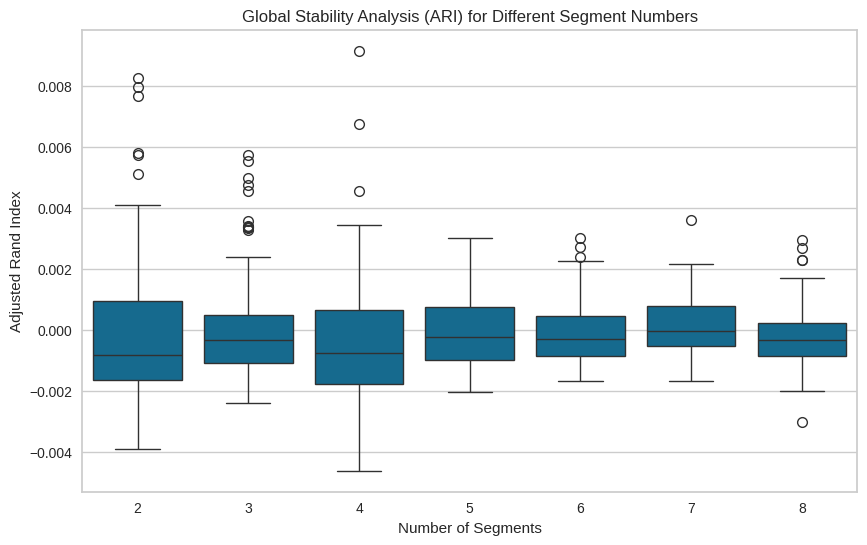

In [102]:


# Set random seed for reproducibility
np.random.seed(1234)


# Function to calculate global stability
def calculate_global_stability(X, cluster_range, nrep=10, nboot=100):
    stability_results = {k: [] for k in cluster_range}

    # Loop through each number of clusters
    for k in cluster_range:
        # Fit the original k-means model

        labels_original = MD_km28[str(k)].predict(X)

        # Perform bootstrapping
        for _ in range(nboot):
            # Bootstrap sample
            X_bootstrap = resample(X, random_state=np.random.randint(10000))

            # Fit k-means on bootstrap sample
            kmeans_bootstrap = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
            labels_bootstrap = kmeans_bootstrap.fit_predict(X_bootstrap)

            # Calculate ARI between original and bootstrapped labels
            ari = adjusted_rand_score(labels_original, labels_bootstrap)
            stability_results[k].append(ari)

    return stability_results

# Define the range of clusters (2 to 8)
cluster_range = range(2, 9)

# Calculate global stability using bootstrap samples
stability_results = calculate_global_stability(MD_Data, cluster_range, nrep=10, nboot=100)

# Convert stability results into a format suitable for plotting
stability_df = pd.DataFrame([
    {'number_of_segments': k, 'ARI': ari}
    for k, aris in stability_results.items()
    for ari in aris
])

# Plot global stability using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='number_of_segments', y='ARI', data=stability_df)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Analysis (ARI) for Different Segment Numbers')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

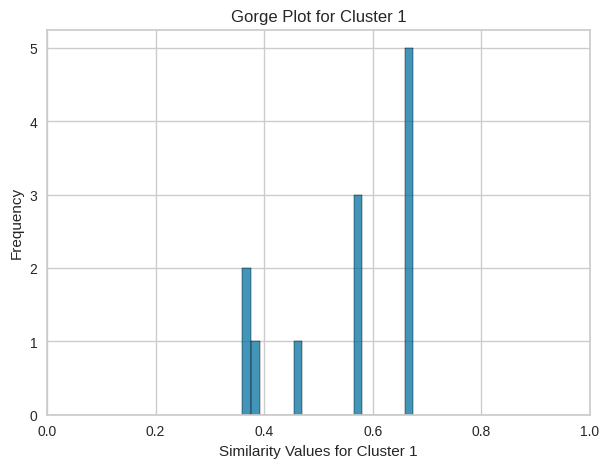

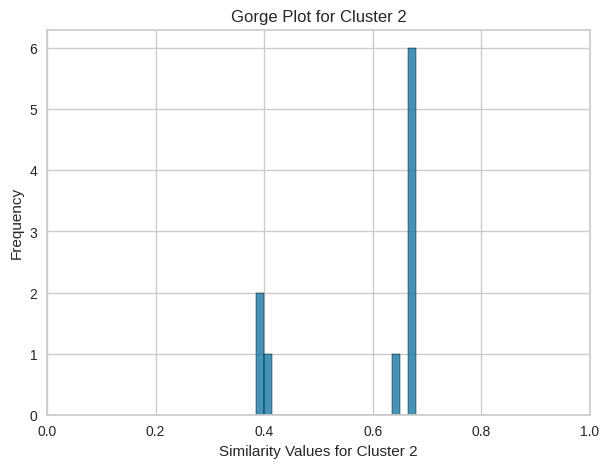

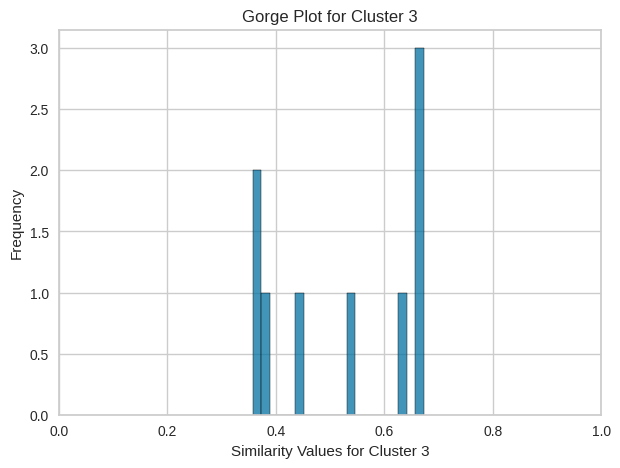

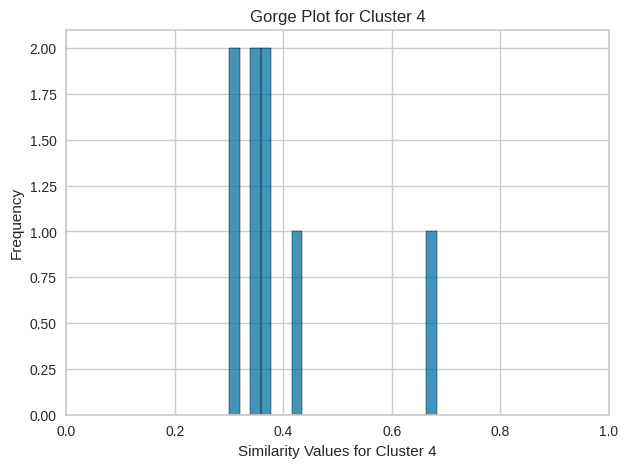

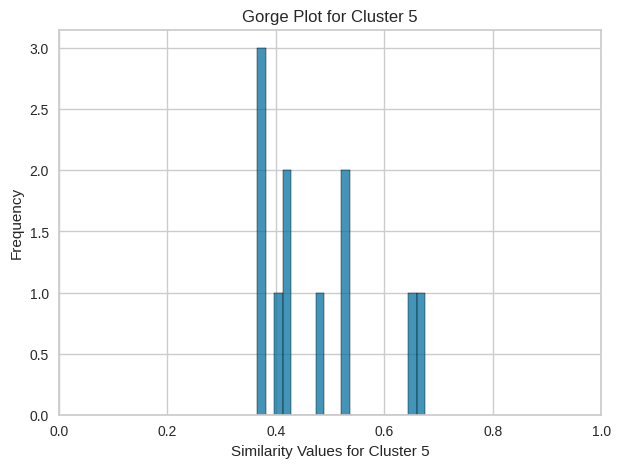

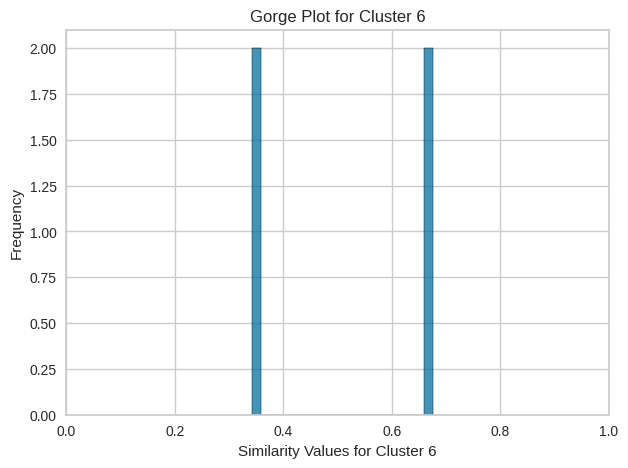

In [120]:




n_restarts = 10
n_segments = 6
random_state = 1234

# Store cluster labels and centroids from each k-means run
labels_list = []
centroids_list = []

# Run k-means clustering multiple times (e.g., 10 times)
for i in range(n_restarts):
    kmeans = KMeans(n_clusters=n_segments, init='k-means++', random_state=0+ i)
    kmeans.fit(MD_Data)
    labels_list.append(kmeans.labels_)
    centroids_list.append(kmeans.cluster_centers_)

# Function to match clusters based on centroids
def match_clusters(centroids1, centroids2):
    # Compute distance matrix between centroids of two runs
    distance_matrix = np.linalg.norm(centroids1[:, np.newaxis] - centroids2, axis=2)
    # Use Hungarian algorithm to find the optimal matching
    row_ind, col_ind = linear_sum_assignment(distance_matrix)
    return col_ind  # This gives the matching between clusters

# Calculate cluster-specific similarity
similarity_per_cluster = {i: [] for i in range(n_segments)}

for i in range(n_restarts):
    for j in range(i + 1, n_restarts):
        # Match clusters from run i to run j
        matched_clusters = match_clusters(centroids_list[i], centroids_list[j])

        # Calculate similarity for each matched cluster
        for cluster_idx in range(n_segments):
            # Get the labels for the matched clusters
            cluster_i_labels = (labels_list[i] == cluster_idx).astype(int)
            cluster_j_labels = (labels_list[j] == matched_clusters[cluster_idx]).astype(int)

            # Compute adjusted Rand index for the specific cluster
            similarity = adjusted_rand_score(cluster_i_labels, cluster_j_labels)
            similarity_per_cluster[cluster_idx].append(similarity)

# Plot similarity values for each cluster
for cluster_idx in range(n_segments):
    similarity_values = np.array(similarity_per_cluster[cluster_idx])

    # Filter values between 0.3 and 0.7 as mentioned in the text
    filtered_similarity_values = similarity_values[(similarity_values >= 0.3) & (similarity_values <= 0.7)]

    # Create histogram for each cluster
    sns.histplot(filtered_similarity_values, bins=20, kde=False)
    plt.xlim(0, 1)
    plt.xlabel(f"Similarity Values for Cluster {cluster_idx + 1}")
    plt.ylabel("Frequency")
    plt.title(f"Gorge Plot for Cluster {cluster_idx + 1}")
    plt.show()


In [122]:
labels_list

[array([2, 5, 1, ..., 1, 4, 3], dtype=int32),
 array([3, 5, 0, ..., 0, 1, 2], dtype=int32),
 array([0, 3, 1, ..., 1, 2, 4], dtype=int32),
 array([2, 0, 0, ..., 0, 1, 5], dtype=int32),
 array([2, 3, 5, ..., 5, 0, 4], dtype=int32),
 array([3, 5, 2, ..., 2, 0, 1], dtype=int32),
 array([3, 5, 0, ..., 0, 2, 4], dtype=int32),
 array([0, 1, 5, ..., 5, 2, 3], dtype=int32),
 array([5, 2, 4, ..., 4, 0, 1], dtype=int32),
 array([2, 5, 3, ..., 3, 4, 1], dtype=int32)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

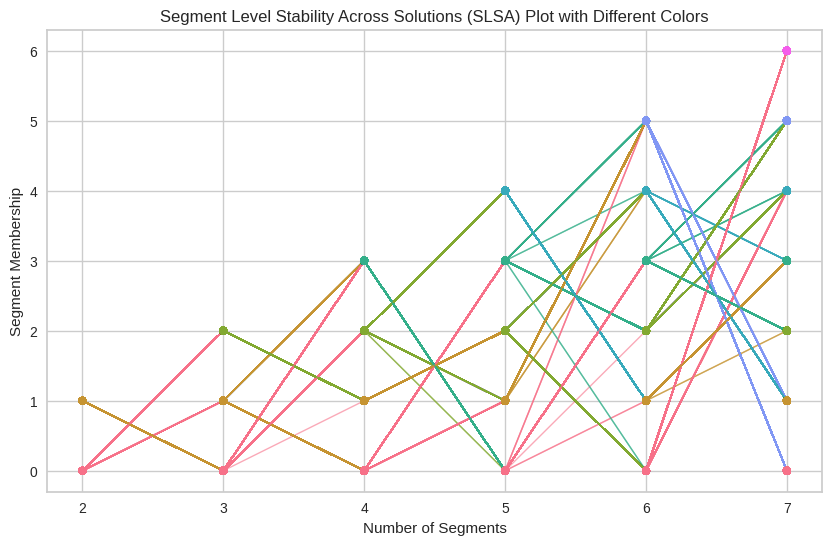

In [104]:




# Perform k-means clustering for segment numbers from 2 to 5
n_segments_range = range(2, 8)
random_state = 1234

# Store cluster memberships for each solution
segment_memberships = {}

for n_segments in n_segments_range:

    kmeans=MD_km28[str(n_segments)]
    labels = kmeans.fit_predict(MD_Data)
    segment_memberships[n_segments] = labels

# Create a matrix that tracks how points change segments across solutions
n_points = MD_Data.shape[0]
membership_changes = np.zeros((n_points, len(n_segments_range)))

# Populate the membership_changes matrix
for idx, n_segments in enumerate(n_segments_range):
    membership_changes[:, idx] = segment_memberships[n_segments]

# Set up colors for each segment, assuming max 5 segments
n_segments_max = max(n_segments_range)
colors = sns.color_palette("husl", n_segments_max)  # Use a distinct color for each segment

# Visualize the Segment Level Stability Across Solutions (SLSA) plot
plt.figure(figsize=(10, 6))

# Plot how points change membership across segmentations
for i in range(n_points):
    for j in range(len(n_segments_range) - 1):
        if membership_changes[i, j] != membership_changes[i, j + 1]:
            # Draw lines between changing segments with different colors for each segment
            color_idx = int(membership_changes[i, j] % n_segments_max)  # Ensure colors repeat if necessary
            plt.plot([j, j + 1],
                     [membership_changes[i, j], membership_changes[i, j + 1]],
                     color=colors[color_idx], lw=1, alpha=0.6)

# Add markers to indicate segments
for j, n_segments in enumerate(n_segments_range):
    plt.scatter([j] * n_points, membership_changes[:, j],
                c=[colors[int(membership_changes[i, j] % n_segments_max)] for i in range(n_points)],
                s=30, zorder=3)

# Customize the plot
plt.xlabel("Number of Segments")
plt.ylabel("Segment Membership")
plt.xticks(ticks=np.arange(len(n_segments_range)), labels=[f"{n}" for n in n_segments_range])
plt.title("Segment Level Stability Across Solutions (SLSA) Plot with Different Colors")
plt.show()


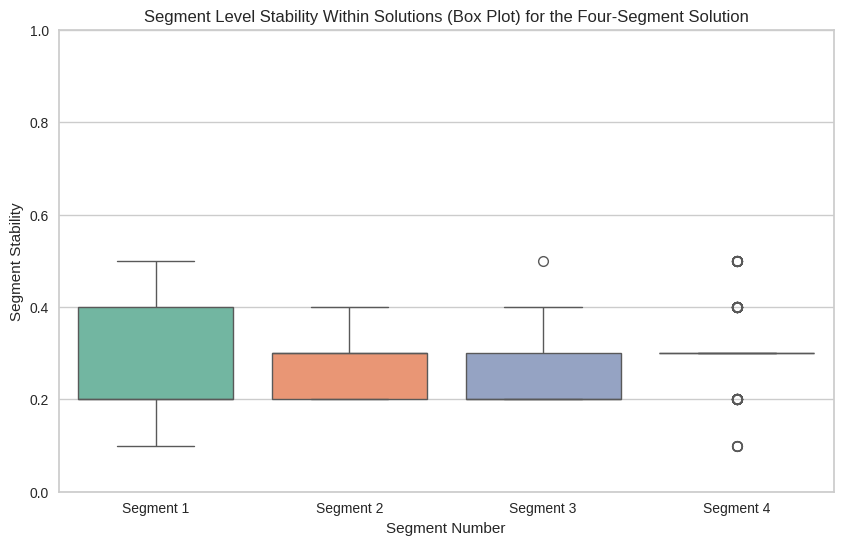

In [105]:



# Select the 4-segment solution with multiple restarts
n_segments = 4
n_restarts = 10
random_state = 1234

# Store cluster labels from each k-means run
all_labels = np.zeros((MD_Data.shape[0], n_restarts))

# Perform multiple k-means clustering runs
for i in range(n_restarts):
    kmeans = KMeans(n_clusters=n_segments, n_init=1, random_state=random_state + i)
    all_labels[:, i] = kmeans.fit_predict(MD_Data)

# Initialize list to hold stability scores for each segment
segment_stability = [[] for _ in range(n_segments)]

# Calculate segment-level stability within the 4-segment solution
for segment in range(n_segments):
    # Get the indices of the data points that are assigned to this segment in the first run
    initial_membership = all_labels[:, 0] == segment

    # For each point in the segment, check how often it stays in the same segment across all runs
    for i in range(MD_Data.shape[0]):
        if initial_membership[i]:  # Only for points in the current segment
            stability_score = np.sum(all_labels[i, :] == segment) / n_restarts
            segment_stability[segment].append(stability_score)

# Plot segment stability as box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=segment_stability, palette="Set2")

# Customizing plot labels and axis limits
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Level Stability Within Solutions (Box Plot) for the Four-Segment Solution")
plt.xticks(np.arange(n_segments), [f"Segment {i+1}" for i in range(n_segments)])

# Display the plot
plt.show()


In [106]:



# Set a seed value to make the random number generation reproducible.
# This ensures that the same random numbers are generated every time the code is run with the same seed.
np.random.seed(1234)

# Define the range of the number of clusters to test (from 2 to 8, excluding 9).
k_values = range(2, 9)

# Create an empty list to store the results for different numbers of clusters.
# The results include various clustering evaluation metrics for each number of clusters.
MD_m28 = []

# Iterate over each number of clusters (2 to 8) to perform KMeans clustering and calculate evaluation metrics.
for k in k_values:
    # Create a KMeans model with 'k' clusters and a fixed random seed for reproducibility.
    model = KMeans(n_clusters=k, random_state=1234)

    # Fit the KMeans model on the original data 'MD_Data'.
    model.fit(MD_Data.values)

    # Get the number of iterations required for the model to converge.
    iter_val = model.n_iter_

    # Check if the model has converged (reached a stable solution).
    # In the KMeans algorithm, convergence means that the cluster assignments do not change in consecutive iterations.
    converged = True

    # Store the current number of clusters ('k') and an extra variable 'k0_val'.
    # The purpose of 'k0_val' is not explicitly clear in the code.
    k_val = k
    k0_val = k

    # Calculate the log-likelihood of the data under the clustering model.
    log_likelihood = -model.inertia_

    # Get the number of samples (data points) and features in the 'MD_Data' DataFrame.
    n_samples, _ = MD_Data.shape

    # Calculate the Akaike Information Criterion (AIC) for model evaluation.
    aic = -2 * log_likelihood + 2 * k

    # Calculate the Bayesian Information Criterion (BIC) for model evaluation.
    # The BIC penalizes complex models by taking into account both the likelihood and the number of parameters (k).
    bic = -2 * log_likelihood + np.log(n_samples) * k

    # Get the cluster labels for the data points based on the clustering model.
    labels = model.labels_

    # Calculate the proportion of data points in each cluster and store it as 'probs'.
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())

    # Calculate the entropy of the cluster assignments to measure cluster purity.
    class_entropy = entropy(probs)

    # Calculate the Integrated Complete Likelihood (ICL) for model selection.
    # The ICL is obtained by subtracting the class entropy from the BIC.
    icl = bic - class_entropy

    # Append the evaluation metrics for the current number of clusters to the 'MD_m28' list.
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))

# Convert the list of evaluation metrics into a pandas DataFrame for easy tabular representation.
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

# Print the DataFrame containing the evaluation metrics for different numbers of clusters.
print(MD_m28)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     8       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     9       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3233.753684
3    13       True  5   5 -1435.324786  2880.649571  2907.056500  2905.465473
4    10       True  6   6 -1332.150483  2676.300966  2707.989280  2706.201149
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6    10       True  8   8 -1191.580948  2399.161896  2441.412982  2439.379225


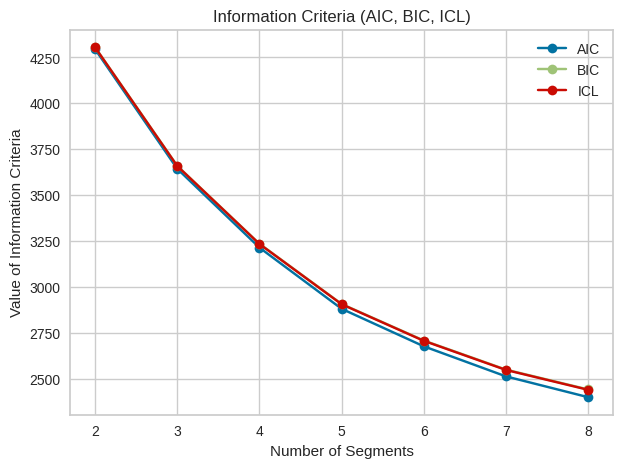

In [107]:
# Extract the 'k' values (number of clusters) from the 'MD_m28' DataFrame.
num_segments = MD_m28["k"]

# Extract the AIC (Akaike Information Criterion) values from the 'MD_m28' DataFrame.
AIC_values = MD_m28["AIC"]

# Extract the BIC (Bayesian Information Criterion) values from the 'MD_m28' DataFrame.
BIC_values = MD_m28["BIC"]

# Extract the ICL (Integrated Complete Likelihood) values from the 'MD_m28' DataFrame.
ICL_values = MD_m28["ICL"]

# Create a plot showing the values of different information criteria (AIC, BIC, ICL) for each number of clusters.
plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

# Set the x-axis label for the plot to indicate the number of segments (number of clusters).
plt.xlabel('Number of Segments')

# Set the y-axis label for the plot to indicate the values of information criteria.
plt.ylabel('Value of Information Criteria')

# Set the title for the plot to describe the visualization.
plt.title('Information Criteria (AIC, BIC, ICL)')

# Display a legend to identify the information criteria (AIC, BIC, ICL) in the plot.
plt.legend()

# Display grid lines in the plot to improve visual interpretation.
plt.grid(True)

# Show the plot with information criteria values for different numbers of clusters.
plt.show()

In [108]:
# Import GaussianMixture from the 'sklearn.mixture' module.
# GaussianMixture is a probabilistic model for clustering using the Expectation-Maximization algorithm.


# Set the number of clusters to 4 for both KMeans and Gaussian Mixture models.
k = 4

# Create a KMeans model with 4 clusters using a fixed random seed for reproducibility.
kmeans = KMeans(n_clusters=k, random_state=1234)

# Fit the KMeans model on the original data 'MD_Data'.
kmeans.fit(MD_Data)

# Get the cluster assignments (labels) for the data points based on the KMeans model.
kmeans_clusters = kmeans.predict(MD_Data)

# Create a Gaussian Mixture model with 4 components (clusters) using a fixed random seed for reproducibility.
gmm = GaussianMixture(n_components=k, random_state=1234)

# Fit the Gaussian Mixture model on the original data 'MD_Data'.
gmm.fit(MD_Data)

# Get the cluster assignments (labels) for the data points based on the Gaussian Mixture model.
gmm_clusters = gmm.predict(MD_Data)

# Create a DataFrame 'results' to store the cluster assignments from KMeans and Gaussian Mixture models.
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

# Filter the original data 'MD_Data' to include only the data points that belong to the 4th cluster according to the Gaussian Mixture model.
# Store this filtered data in 'MD_m4'.
MD_m4 = MD_Data[results['mixture'] == 3]

# Create a KMeans model with 4 clusters specifically for the filtered data 'MD_m4'.
k4_m4 = KMeans(n_clusters=k, random_state=1234)

# Fit the KMeans model on the filtered data 'MD_m4'.
k4_m4.fit(MD_m4)

# Get the cluster assignments (labels) for the data points in 'MD_m4' based on the KMeans model.
k4_m4_clusters = k4_m4.predict(MD_m4)

# Create a DataFrame 'results_m4' to store the cluster assignments from the KMeans model applied to 'MD_m4'.
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

# Print the cross-tabulation (contingency table) between the cluster assignments from KMeans and Gaussian Mixture models.
print(pd.crosstab(results['kmeans'], results['mixture']))

# Print the cross-tabulation (contingency table) between the cluster assignments from KMeans on 'MD' and KMeans on 'MD_m4'.
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


mixture    0    1    2    3
kmeans                     
0         99    5  253    7
1          0  211   24    5
2        500    0    0   33
3         22   38    0  256
kmeans   0   1   2   3
kmeans                
0       29  10  17  23
1       18   8  12  11
2       45  14  31  19
3       29   5  15  15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [109]:
# Import GaussianMixture from the 'sklearn.mixture' module.
# GaussianMixture is a probabilistic model for clustering using the Expectation-Maximization algorithm.


# Create a Gaussian Mixture model with 4 components (clusters) for the original data 'MD_Data'.
gmm_m4a = GaussianMixture(n_components=4)

# Fit the Gaussian Mixture model on the original data 'MD_Data'.
gmm_m4a.fit(MD_Data)

# Calculate the log-likelihood of the original data 'MD_Data' under the Gaussian Mixture model.
# The log-likelihood represents the logarithm of the likelihood function, which measures how well the model fits the data.
# A higher log-likelihood indicates a better fit of the data to the model.
log_likelihood_m4a = gmm_m4a.score(MD_Data)

# Create another Gaussian Mixture model with 4 components (clusters) for the original data 'MD_Data'.
gmm_m4 = GaussianMixture(n_components=4)

# Fit the second Gaussian Mixture model on the original data 'MD_Data'.
gmm_m4.fit(MD_Data)

# Calculate the log-likelihood of the original data 'MD_Data' under the second Gaussian Mixture model.
log_likelihood_m4 = gmm_m4.score(MD_Data)

# Print the calculated log-likelihood values for the two Gaussian Mixture models.
print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071887
Log-likelihood for MD.m4: 3.6427464011765807


In [110]:
# Calculate the value counts of the 'Like' column in the 'McDonald' DataFrame.
# The 'value_counts' function counts the occurrences of each unique value in the specified column.
like_counts = pd.value_counts(McDonald['Like'])
# Reverse the order of the value counts obtained for the 'Like' column.
# The 'iloc[::-1]' slicing is used to reverse the order of the counts.
reversed_counts = like_counts.iloc[::-1]
# Print the reversed value counts, which now display the counts in descending order of unique values.
print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


<ipython-input-110-c998cab9dbd9>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(McDonald['Like'])


In [111]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}
# Create a new column 'Like.n' in the 'McDonald' DataFrame using the 'map' function.
# The 'like_mapping' variable is assumed to contain a mapping (dictionary) that transforms the 'Like' column values.
# The 'map' function applies the mapping to each value in the 'Like' column and stores the result in the 'Like.n' column.
McDonald['Like.n'] = McDonald['Like'].map(like_mapping)
# Calculate the value counts of the newly created 'Like.n' column in the 'McDonald' DataFrame.
# The 'value_counts' function counts the occurrences of each unique value in the specified column.
like_n_counts = McDonald['Like.n'].value_counts()
# Print the value counts of the 'Like.n' column, which shows the counts of each unique value in the column.
# The result helps in understanding the distribution of the transformed 'Like' column values after mapping.
print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [112]:
# Import 'dmatrices' from the 'patsy' module.
# 'dmatrices' is used to create design matrices for statistical models, including linear regression.


# Extract the names of independent variables from the 'McDonald' DataFrame.
# The first 11 columns (0 to 10) of the DataFrame are considered as independent variables.
independent_vars = McDonald.columns[0:11]

# Create a string representation of the formula for the linear regression model.
# The formula_str will contain the independent variables separated by '+', indicating their inclusion in the model.
formula_str = ' + '.join(independent_vars)

# Append the dependent variable 'Like' to the formula_str, specifying it as the response variable.
formula_str = 'Like ~ ' + formula_str

# Create design matrices for the linear regression model using the formula and 'McDonald'.
# The 'dmatrices' function parses the formula and constructs the matrices for the model.
# 'f' will be the design matrix for the dependent variable 'Like' (response variable).
f = dmatrices(formula_str, data=McDonald)[1]

# Print the design matrix 'f' for the dependent variable 'Like'.
# The design matrix is a matrix representation of the data that includes both the dependent variable and the independent variables.
# It is us
print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [113]:



# Set a fixed random seed for reproducibility.
np.random.seed(1234)

# Create a design matrix 'X' for the independent variables using 'dmatrix'.
# The 'f.design_info' is the design matrix from the previous code snippet representing the independent variables.
# 'data=data' specifies that the data should be taken from the 'data' DataFrame.
X = dmatrix(f.design_info, data=McDonald)

# Create a design matrix 'y' for the dependent variable 'Like' using 'dmatrix'.
# The formula 'Like' specifies that only the dependent variable should be considered in the matrix.
# The 'data=data' specifies that the data should be taken from the 'data' DataFrame.
y = dmatrix('Like', data=McDonald)

# Set the number of components for the Gaussian Mixture model.
n_components = 2

# Set the number of initializations for the Gaussian Mixture model.
n_init = 10

# Set the 'verbose' parameter for the Gaussian Mixture model (True to show progress, False otherwise).
verbose = False

# Set the number of repetitions for the model fitting.
n_rep = 10

# Create a Gaussian Mixture model with specified parameters.
model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)

# Fit the Gaussian Mixture model on the design matrices 'X' and 'y'.
# This trains the model to identify clusters based on the data provided.
MD_reg2 = model.fit(X, y)

# Print the trained Gaussian Mixture model.
# The model contains information about the clustering results and learned parameters.
print(MD_reg2)

# Calculate the cluster sizes by counting the occurrences of each cluster label in the data.
cluster_sizes = np.bincount(model.predict(X))

# Print the cluster sizes, i.e., the number of data points assigned to each cluster.
# The cluster sizes give an idea of the distribution of data points among different clusters.
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


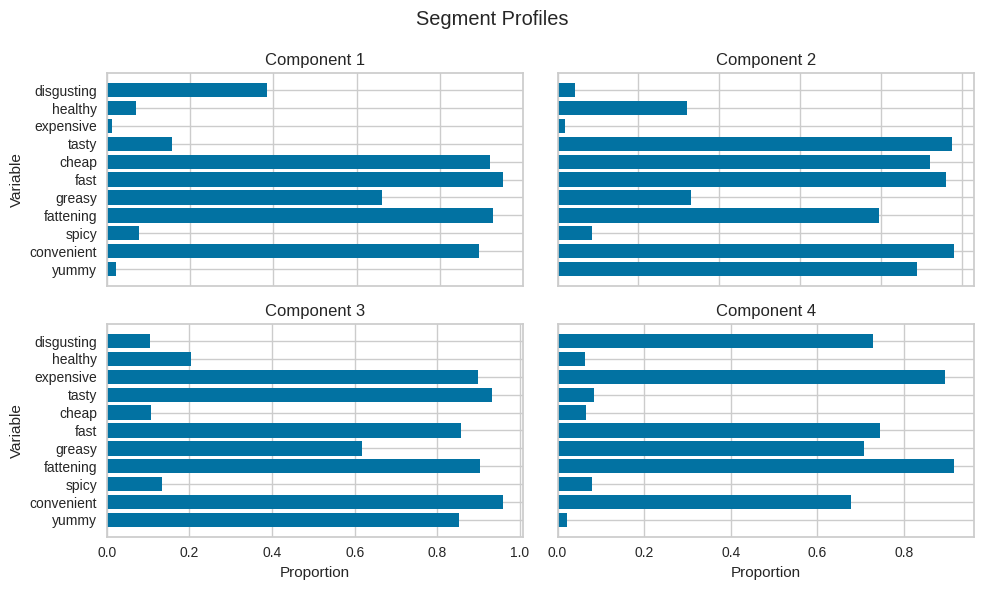

In [114]:


# Get the KMeans model with 4 clusters from 'MD_km28'.

kmeans = MD_km28['4']
# Get the cluster labels assigned by KMeans to each data point.
labels = kmeans.labels_

# Group the data 'MD_Data' by the cluster labels and calculate the mean of each variable for each cluster.
# This results in a DataFrame 'MD_mean' containing the mean values of each variable for each cluster.
MD_mean = MD_Data.groupby(labels).mean()

# Create a 2x2 grid of subplots with the given figure size.
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot the horizontal bar chart for Component 1 in the first subplot.
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')

# Plot the horizontal bar chart for Component 2 in the second subplot.
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')

# Plot the horizontal bar chart for Component 3 in the third subplot.
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')

# Plot the horizontal bar chart for Component 4 in the fourth subplot.
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

# Set common labels for y-axis ('Variable') and x-axis ('Proportion') for all subplots.
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_Data.columns)

# Hide labels and ticks on the shared x- and y-axes for the inner subplots.
for ax in axs.flat:
    ax.label_outer()

# Add a title to the entire figure.
fig.suptitle('Segment Profiles')

# Adjust the layout of subplots to avoid overlapping and make the figure tidy.
fig.tight_layout()

# Display the plot.
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


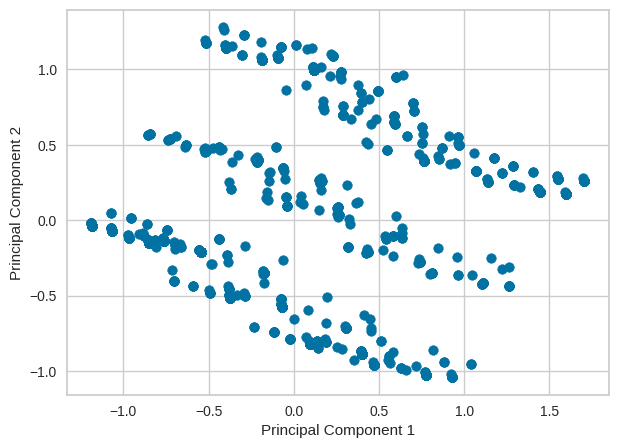

In [115]:


# Create a KMeans clustering model with 4 clusters.
# 'n_clusters=4' specifies that the data should be grouped into 4 clusters.
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model on the data 'MD_Data'.
# The 'fit' function identifies the cluster centers and assigns data points to their respective clusters.
kmeans.fit(MD_Data)

# Create a PCA model with 2 principal components.
# 'n_components=2' specifies that the data should be transformed into a 2-dimensional space.
pca = PCA(n_components=2)

# Transform the data 'MD_pca' using PCA to get the 2 principal components.
# 'MD_pca' will be a 2-dimensional array representing the data in the reduced space.
MD_pca = pca.fit_transform(MD_Data)

# Create a new figure and axis for the scatter plot.
fig, ax = plt.subplots()

# Plot the scatter plot of the data points using the first and second principal components.
# 'MD_pca[:, 0]' represents the first principal component on the x-axis.
# 'MD_pca[:, 1]' represents the second principal component on the y-axis.
ax.scatter(MD_pca[:, 0], MD_pca[:, 1])

# Set the labels for the x-axis and y-axis.
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Display the plot.
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


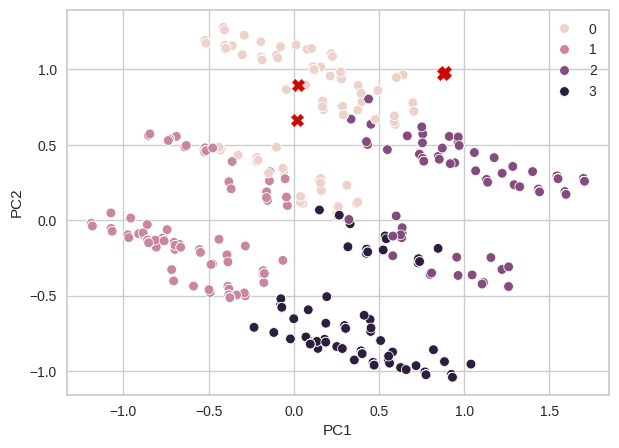

In [145]:
# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_Data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points, colored by cluster


# Plot the cluster centers
sns.scatterplot(data=pca_projection, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


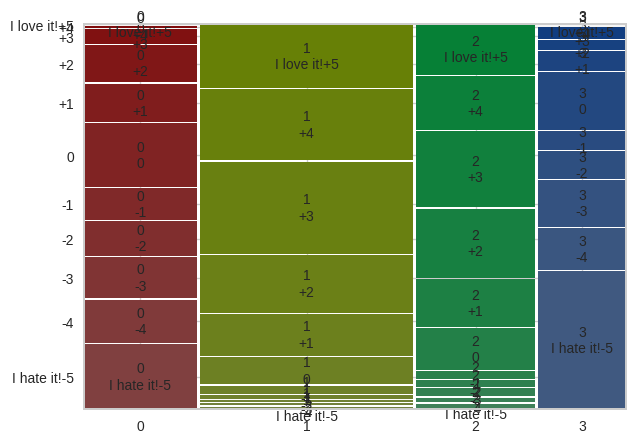

In [126]:


# Define a function 'labelling' to perform label encoding for categorical variables in the DataFrame 'data1'.
# The function takes a categorical column 'x' as input, applies label encoding, and updates the DataFrame.
def labelling(x):
    McDonald[x] = LabelEncoder().fit_transform(McDonald[x])
    return McDonald

# List of categorical columns to be label encoded.
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Loop through each categorical column and apply label encoding using the 'labelling' function.
for i in cat:
    labelling(i)

# Create a DataFrame 'df_eleven' containing only the label encoded categorical columns.
df_eleven = McDonald.loc[:, cat]

# Create a KMeans clustering model with 4 clusters on the label encoded categorical columns.
# 'init='k-means++'' uses the k-means++ initialization method for better convergence.
# 'random_state=0' sets the random seed for reproducibility.
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)

# Add a new column 'cluster_num' to 'McDonald' to store the cluster labels assigned by KMeans.
McDonald['cluster_num'] = kmeans.labels_

# Create a contingency table (crosstab) showing the frequency distribution of 'Like' and 'cluster_num'.
crosstab = pd.crosstab(McDonald['cluster_num'],McDonald['Like'])

# Reorder the columns in the crosstab based on the 'Like' categories for better visualization.
# This ensures the 'Like' categories appear in a specific order in the mosaic plot.
# Convert column names to strings to match the crosstab column names
crosstab = crosstab[['I hate it!-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', 'I love it!+5']]

# Set the figure size for the mosaic plot.
plt.rcParams['figure.figsize'] = (7, 5)

# Create and display the mosaic plot using the 'mosaic' function.
mosaic(crosstab.stack())
plt.show()

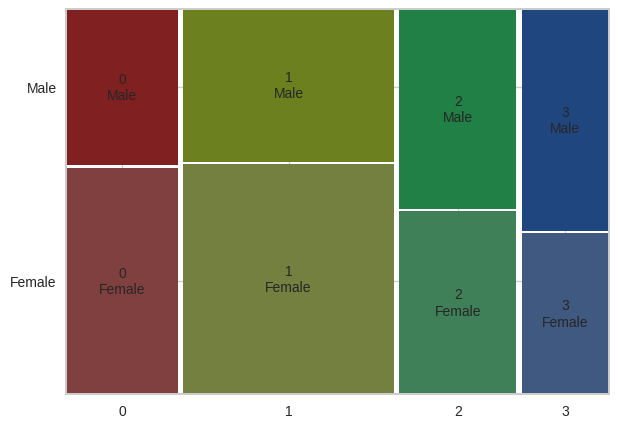

In [127]:
# Import the 'mosaic' function from 'statsmodels.graphics.mosaicplot' for mosaic plots.


# Get the KMeans model with 4 clusters from 'MD_km28'.
MD_k4 = MD_km28['4']

# Get the cluster labels assigned by KMeans to each data point.
k4 = MD_k4.labels_

# Create a contingency table (crosstab) showing the frequency distribution of 'Gender' and 'k4'.
# The crosstab counts the occurrences of each unique combination of 'Gender' and 'k4'.
ct = pd.crosstab(k4, McDonald['Gender'])

# Create a mosaic plot to visualize the relationship between 'Gender' and 'k4'.
# The 'gap=0.01' parameter sets the gap between tiles in the mosaic plot for better visualization.
mosaic(ct.stack(), gap=0.01)

# Display the mosaic plot.
plt.show()


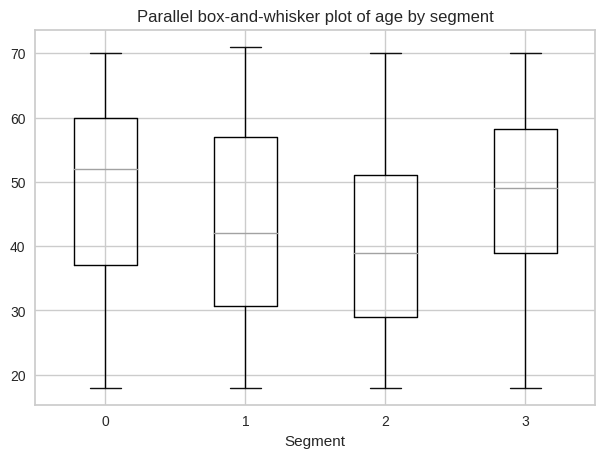

In [128]:
# Create a DataFrame 'df' containing two columns: 'Segment' (cluster labels 'k4') and 'Age' from the 'data' DataFrame.
df = pd.DataFrame({'Segment': k4, 'Age': McDonald['Age']})

# Create a box-and-whisker plot (boxplot) to compare the distribution of 'Age' across different segments.
# The 'by='Segment'' parameter groups the data by the 'Segment' column for separate boxplots for each segment.
# The 'column='Age'' parameter specifies the 'Age' column to plot in the boxplots.
df.boxplot(by='Segment', column='Age')

# Set the title for the plot.
plt.title('Parallel box-and-whisker plot of age by segment')

# Remove the default title added by 'by='Segment''.
plt.suptitle('')

# Display the boxplot.
plt.show()


In [129]:
# Label encode the 'VisitFrequency' column in the 'McDonald' DataFrame.
# The 'LabelEncoder()' is used to transform the 'VisitFrequency' values into numeric labels.
McDonald['VisitFrequency'] = LabelEncoder().fit_transform(McDonald['VisitFrequency'])

# Group the data in 'McDonald' by 'cluster_num' and calculate the mean of 'VisitFrequency' for each cluster.
# The result is a Series 'visit' with the mean 'VisitFrequency' for each cluster.
visit = McDonald.groupby('cluster_num')['VisitFrequency'].mean()

# Convert the 'visit' Series to a DataFrame and reset the index.
# This step is done to convert the 'visit' Series into a DataFrame with 'cluster_num' and 'VisitFrequency' columns.
visit = visit.to_frame().reset_index()

# The 'visit' DataFrame now contains the mean 'VisitFrequency' for each cluster ('cluster_num').
# It shows the average visit frequency for customers belonging to each identified segment or cluster.
visit

,cluster_num,VisitFrequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [130]:
# Label encode the 'Like' column in the 'McDonald' DataFrame.
# The 'LabelEncoder()' is used to transform the 'Like' values into numeric labels.
McDonald['Like'] = LabelEncoder().fit_transform(McDonald['Like'])

# Group the data in 'McDonald' by 'cluster_num' and calculate the mean of 'Like' for each cluster.
# The result is a Series 'Like' with the mean 'Like' value for each cluster.
Like = McDonald.groupby('cluster_num')['Like'].mean()

# Convert the 'Like' Series to a DataFrame and reset the index.
# This step is done to convert the 'Like' Series into a DataFrame with 'cluster_num' and 'Like' columns.
Like = Like.to_frame().reset_index()

# The 'Like' DataFrame now contains the mean 'Like' value for each cluster ('cluster_num').
# It shows the average 'Like' response (encoded as numeric labels) for customers belonging to each identified segment or cluster.
Like

,cluster_num,Like
0,0,5.423948
1,1,3.794828
2,2,3.808642
3,3,6.775000


In [131]:
# Label encode the 'Gender' column in the 'McDonald' DataFrame.
# The 'LabelEncoder()' is used to transform the 'Gender' values into numeric labels.
McDonald['Gender'] = LabelEncoder().fit_transform(McDonald['Gender'])

# Group the data in 'McDonald' by 'cluster_num' and calculate the mean of 'Gender' for each cluster.
# The result is a Series 'Gender' with the mean 'Gender' value for each cluster.
Gender = McDonald.groupby('cluster_num')['Gender'].mean()

# Convert the 'Gender' Series to a DataFrame and reset the index.
# This step is done to convert the 'Gender' Series into a DataFrame with 'cluster_num' and 'Gender' columns.
Gender = Gender.to_frame().reset_index()

# The 'Gender' DataFrame now contains the mean 'Gender' value for each cluster ('cluster_num').
# It shows the average gender representation (encoded as numeric labels) for customers belonging to each identified segment or cluster.
# The gender representation is typically encoded as 0 for one gender and 1 for the other gender (if the gender is binary).
# The DataFrame can provide insights into the gender distribution among different clusters.
Gender

,cluster_num,Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


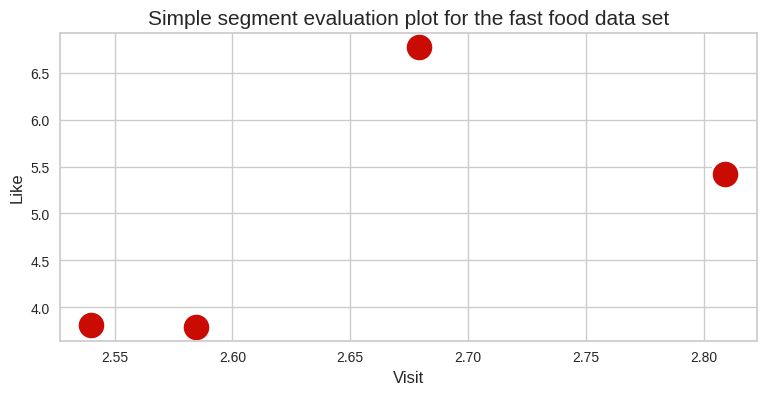

In [132]:



# Merge the 'Gender', 'Like', and 'VisitFrequency' DataFrames on 'cluster_num'.
# The 'merge' function combines the DataFrames based on the common column 'cluster_num'.
# The 'left' join method keeps all rows from the 'Gender' DataFrame and merges matching rows from the 'Like' and 'visit' DataFrames.
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

# Display the 'segment' DataFrame after merging.
segment

# Create a new figure with size (9, 4) for the scatter plot.
plt.figure(figsize=(9, 4))

# Create a scatter plot to visualize the relationship between 'VisitFrequency' and 'Like'.
# 'x = "VisitFrequency"' specifies the 'VisitFrequency' column for the x-axis.
# 'y = "Like"' specifies the 'Like' column for the y-axis.
# 'data=segment' specifies the DataFrame 'segment' containing the data to be plotted.
# 's=400' sets the size of the markers in the scatter plot to 400.
# 'color="r"' sets the color of the markers to red.
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="r")

# Set the title for the plot.
plt.title("Simple segment evaluation plot for the fast food data set", fontsize=15)

# Set the label for the x-axis.
plt.xlabel("Visit", fontsize=12)

# Set the label for the y-axis.
plt.ylabel("Like", fontsize=12)

# Display the plot.
plt.show()